In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [472]:
train_df = pd.read_csv('./input/train.csv')

In [473]:
test_df = pd.read_csv('./input/test.csv')

In [474]:
train_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

为了直观分析， 我们创建一个包含下列的excel表格：
1. Variable：变量名字
2. Type：变量类型，数值型或者类别型。
3. Segment：识别变量的分类。我们可以识别三种可能的类别"building", "space", "location"。 'Building'标识了房屋的物理特征。'space'标识了房屋的空间特征。'location'标识了房屋的空间特征， 如邻居。
4. Expection: 对变量的期望，每个特征变量对Y值得影响，'High', 'Medium', 'Low'
5. Conclusion: 观察分析数据，对每个特征变量实际的影响打分。
6. Comments: 备注

In [475]:
# descriptive statistics summary
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

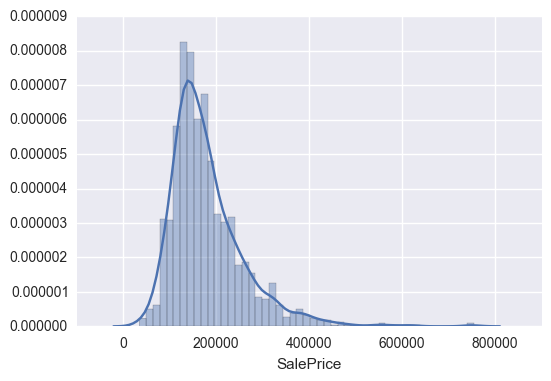

In [476]:
sns.distplot(train_df['SalePrice'])

由图分析可得：
1. 较正态分布偏移较大
2. 有正向偏度
3. 有峰度

In [477]:
# calculate skew and kurtosis
print("Skewness is %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness is 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

In [478]:
def plot_variable(column):
    sns.jointplot(x=column, y='SalePrice', data=train_df)

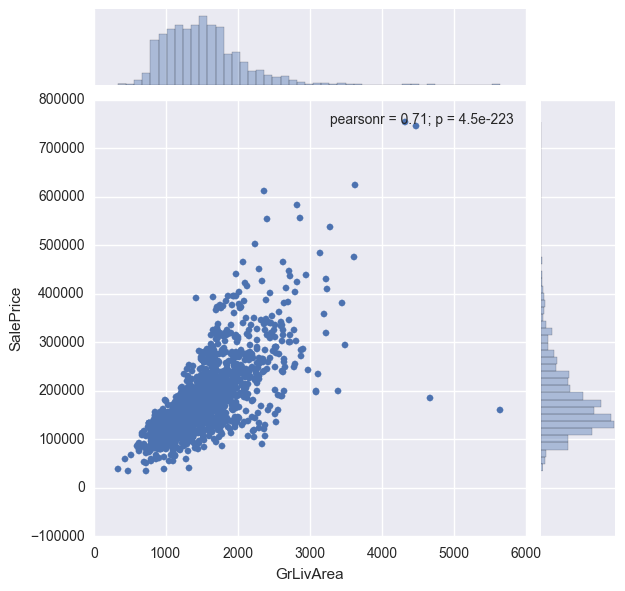

In [479]:
plot_variable('GrLivArea')
# SalePrice and GrLivArea have linear realtion

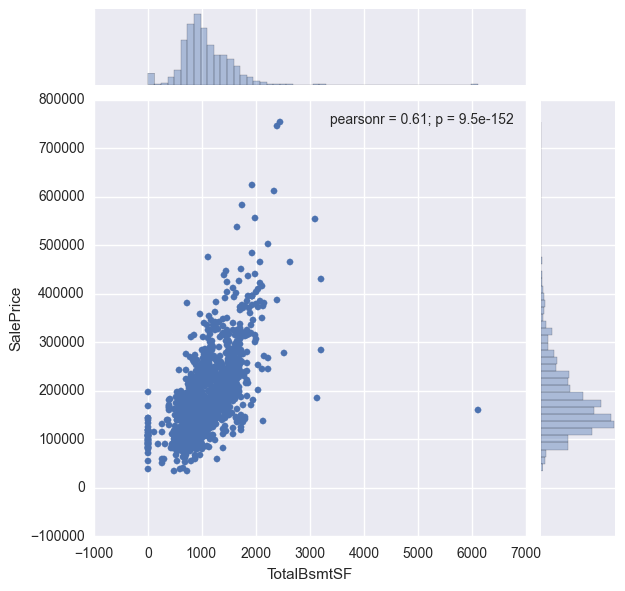

In [480]:
plot_variable('TotalBsmtSF')

In [481]:
def box_plot(column):
    f, ax = plt.subplots(figsize=(16, 8))
    sns.boxplot(x=column, y='SalePrice', data=train_df)

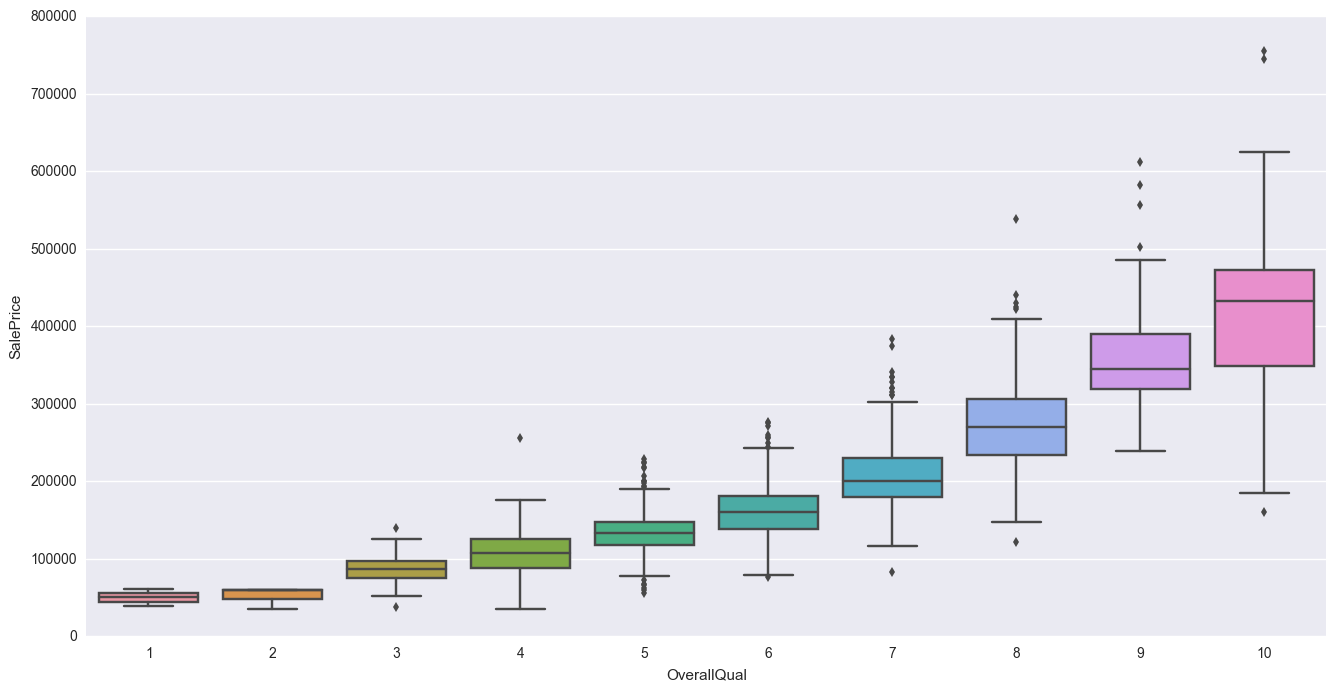

In [482]:
box_plot('OverallQual')
# 说明有较好的区分度

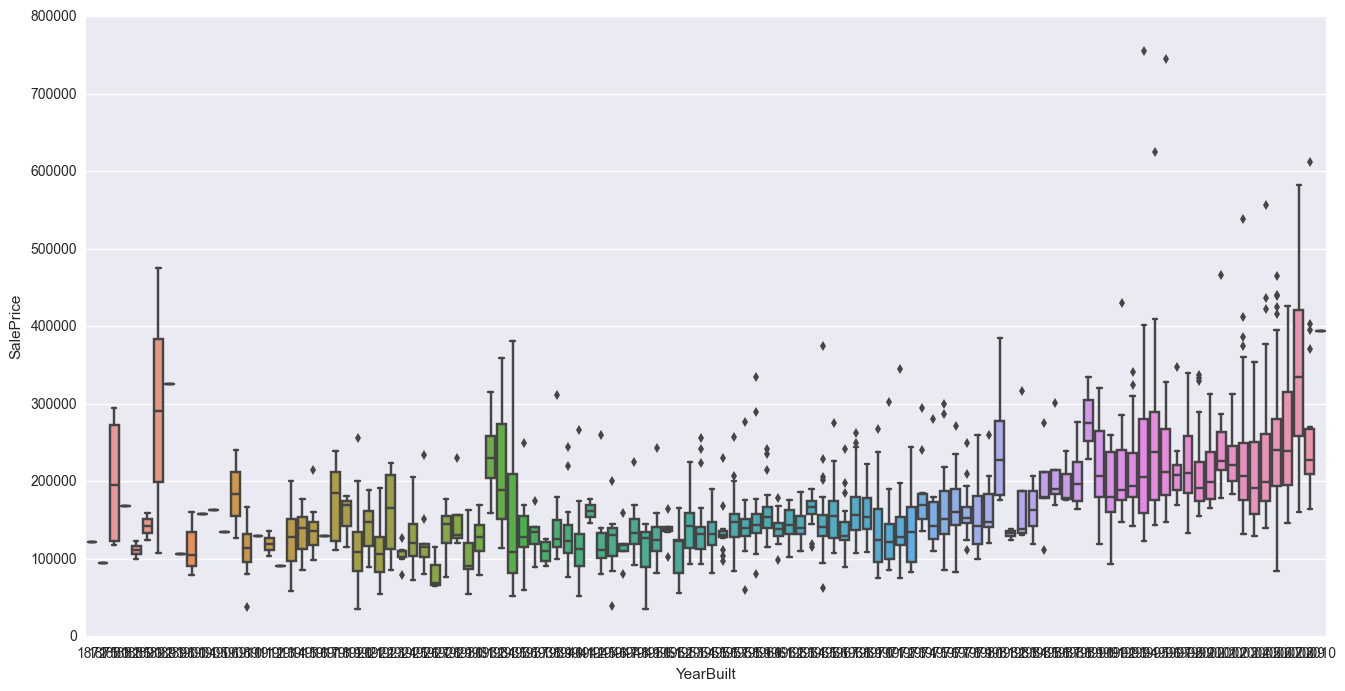

In [483]:
box_plot('YearBuilt')

上面的做法太笨重和主观化了， 需要一个更加客观和规律的方法。
1. Correlation matrix (heatmap style).
2. 'SalePrice' correlation matrix (zoomed heatmap style).
3. Scatter plots between the most correlated variables (move like Jagger style).


## Correlation matrix

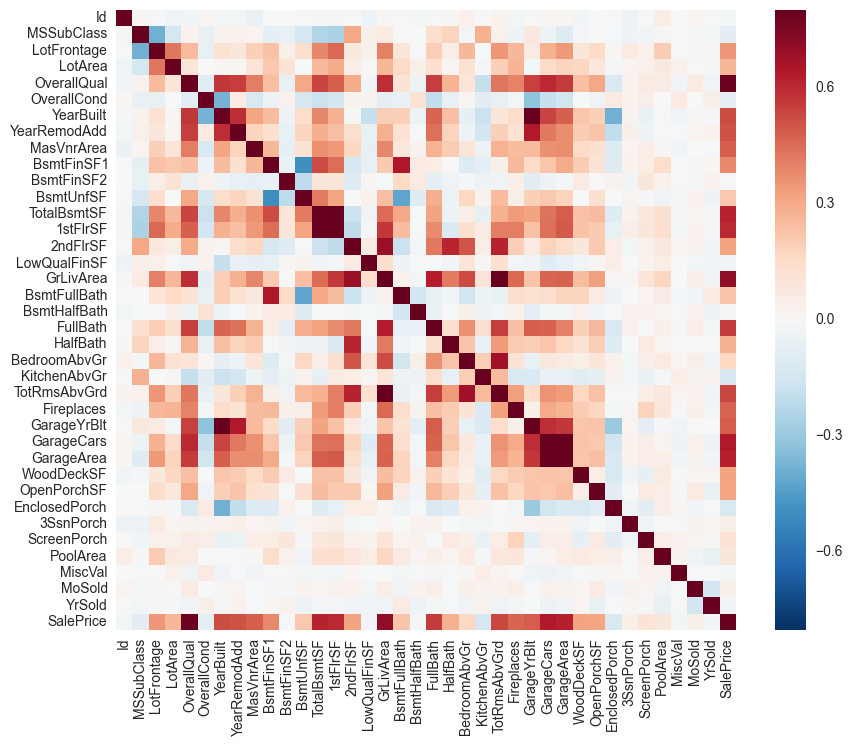

In [484]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [485]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


##  'SalePrice' correlation matrix (zoomed heatmap style).

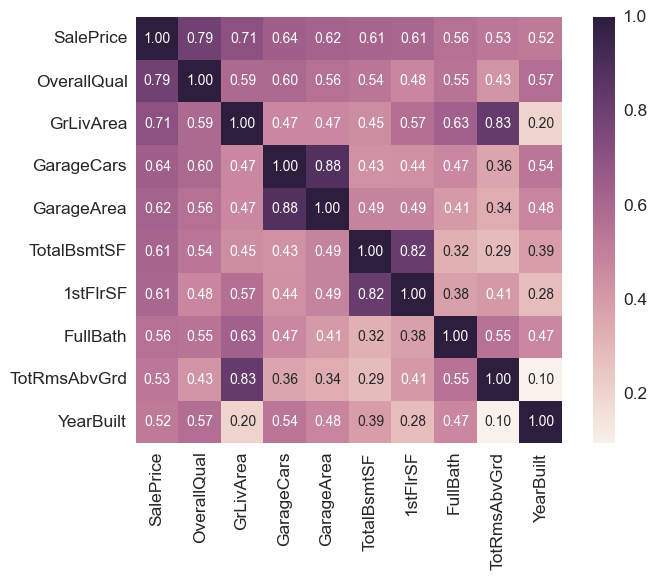

In [486]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = train_df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

所以， OverallQual, GrLivArea， TotalBsmtSF和SalePrice有很强的相关性。
同时会发现一些特征有相关性特征， 如GarageArea和GarageCars.

## scatter plots

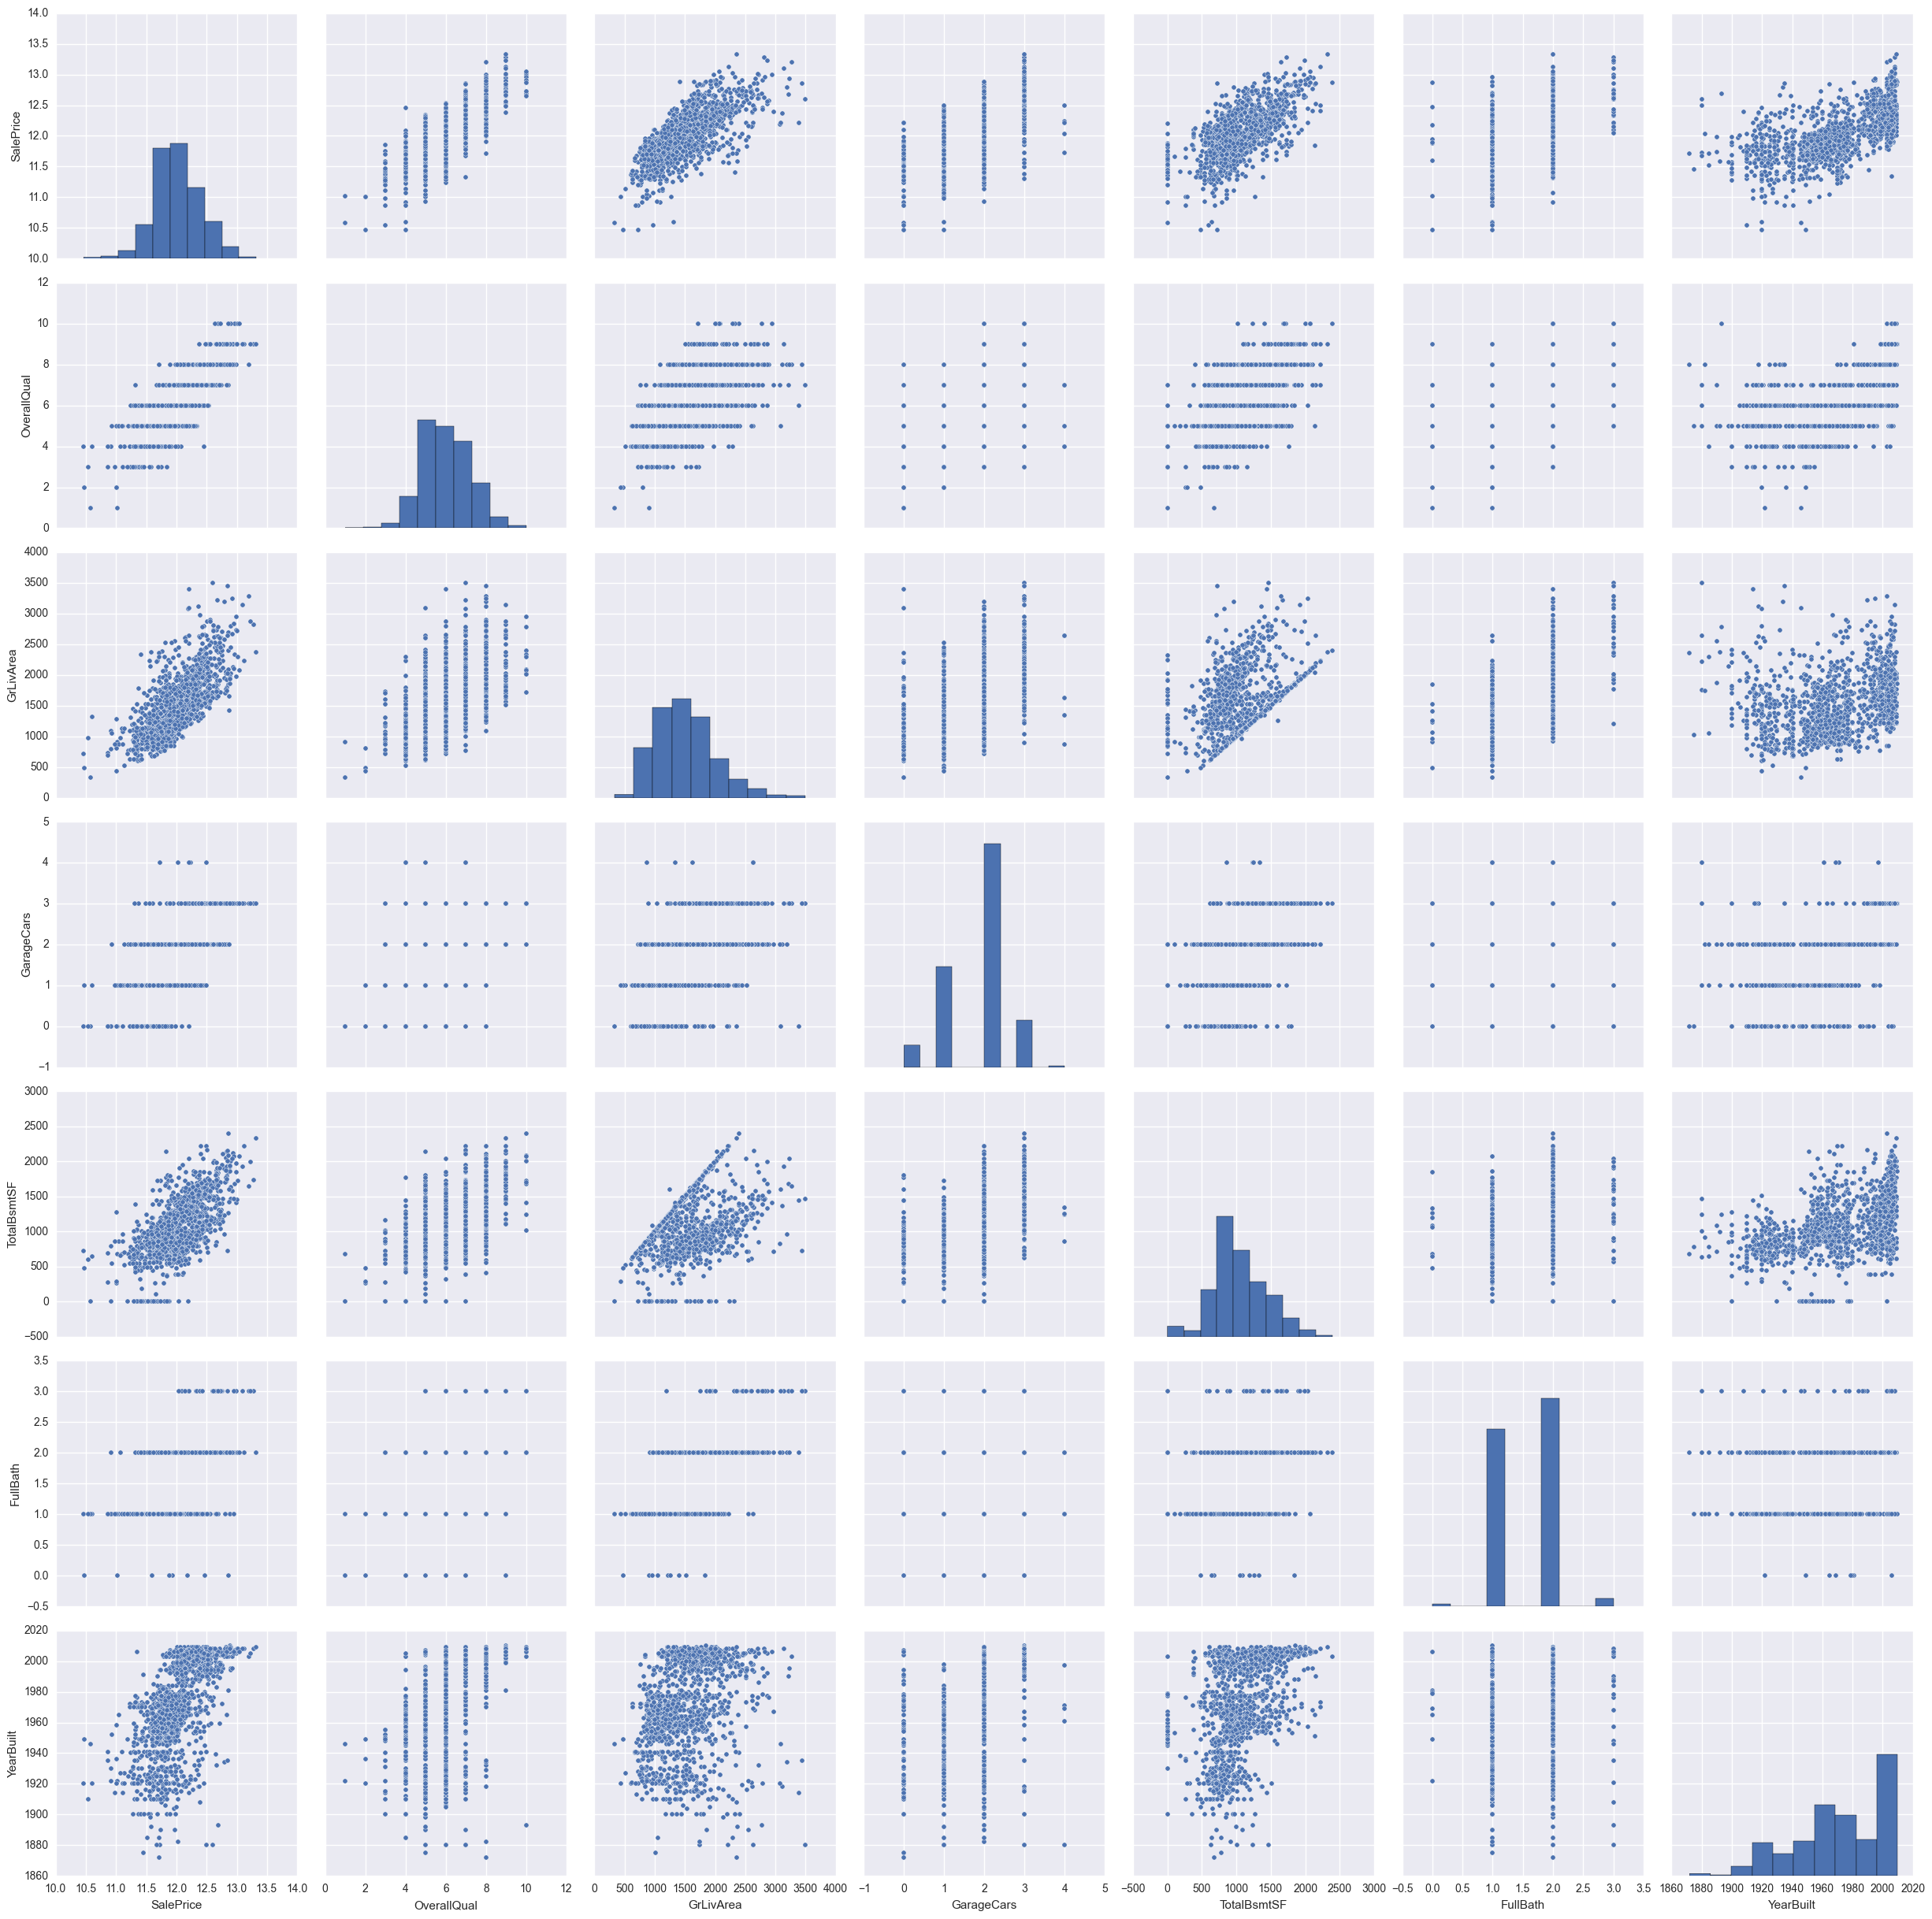

In [534]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 3.5)
plt.show();

# outliers

In [535]:
# cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# for col in cols:
#     print(train_df[col].describe(percentiles=[.75, .85, .95, .97, .999]))
outlier_cols = {
    'OverallQual': 10,
    'GrLivArea': 3500,
    'TotalBsmtSF': 2500,
}
for key, val in outlier_cols.items():
    print key, val, train_df[train_df[key] > val].index
    train_df.drop(train_df[train_df[key] > val].index, axis=0, inplace=True)

GrLivArea 3500 Int64Index([], dtype='int64')
TotalBsmtSF 2500 Int64Index([], dtype='int64')
OverallQual 10 Int64Index([], dtype='int64')


## Missing Data
Important questions when thinking about missing data:
1. How prevalant is the missing data?
2. Is missing data random or does it have a pattern?

In [536]:
all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'], test_df.loc[:, 'MSSubClass':'SaleCondition']))
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
PoolQC,2900,0.997249
MiscFeature,2803,0.963893
Alley,2710,0.931912
Fence,2340,0.804677
FireplaceQu,1420,0.488308
LotFrontage,484,0.166437
GarageCond,159,0.054677
GarageQual,159,0.054677
GarageYrBlt,159,0.054677
GarageFinish,159,0.054677


1. 对于缺失率大于15%的数据我们直接删除掉， 因为这些数据如果很重要可能有这么高的缺失率，除非他根本不重要， 我们也没必要花费大力气去填充它。
2. 对于GarageX有着相同的缺失率，通过查看数据是相同的行。可以一并处理， 同理BsmtX.
3. MasVnrX、Electrical占比很小，忽略。

In [537]:
all_data.drop(missing_data[missing_data.Total>1].index, axis=1, inplace=True)
all_data = all_data.fillna(all_data.mean())

## transform the skew data

In [538]:
from scipy.stats import skew
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
numerical_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = train_df[numerical_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [539]:
all_data = pd.get_dummies(all_data)

In [540]:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df.SalePrice

## ridge model

In [541]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [542]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

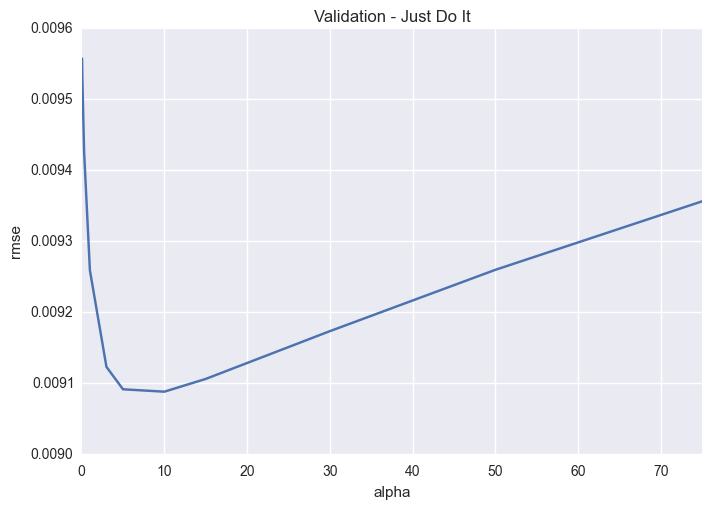

In [543]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [544]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [545]:
ridge_y_test = ridge_model.predict(X_test)

In [546]:
def out_put(y_test, exp=True):
    pred = np.expm1(y_test) if exp else y_test
    result = pd.DataFrame({
        'Id': test_df.Id,
        'SalePrice': pred,
    })
    result.to_csv('house.csv', index=False)

In [547]:
out_put(ridge_y_test)

# use xgboost model

In [548]:
# help(xgb.cv)

In [549]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y)
dtest = xgb.DMatrix(X_test)
params = {'max_depth':4, 'eta': 0.01, 'subsample': 0.8}
model = xgb.cv(params, dtrain, num_boost_round=400, early_stopping_rounds=100)

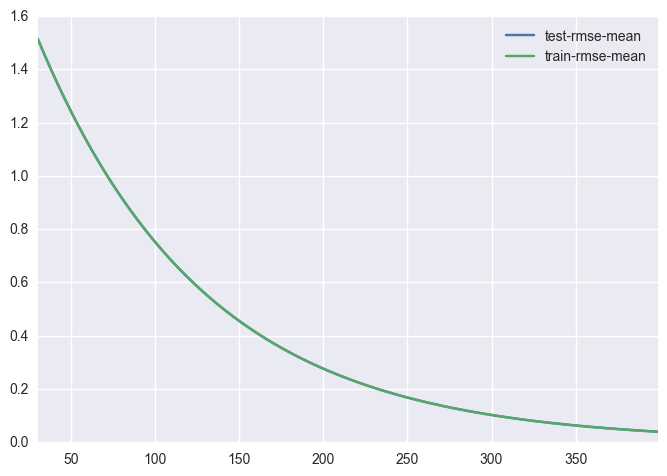

In [550]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [551]:
xgb_model = xgb.XGBRegressor(n_estimators=400, max_depth=4, learning_rate=0.05, subsample=0.8,)
xgb_model.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [552]:
xgb_y_test = xgb_model.predict(X_test)

In [553]:
out_put(xgb_y_test)

## Lasso model

In [554]:
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(lasso_model).mean()

0.010288892059000878

In [555]:
lasso_y_test = lasso_model.predict(X_test)

In [556]:
out_put(lasso_y_test)

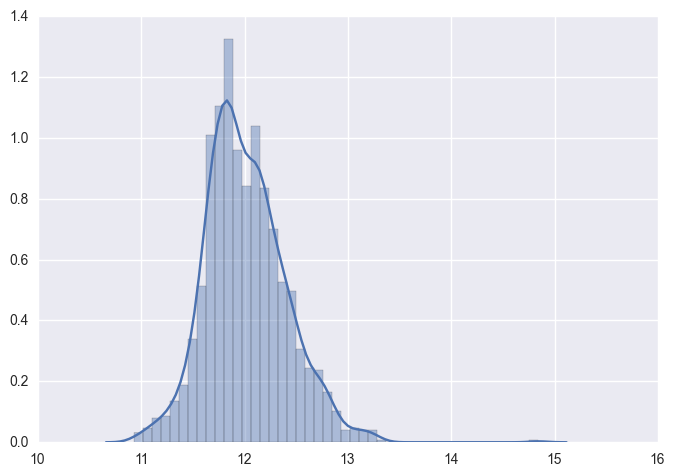

In [557]:
sns.distplot(np.expm1(lasso_y_test))

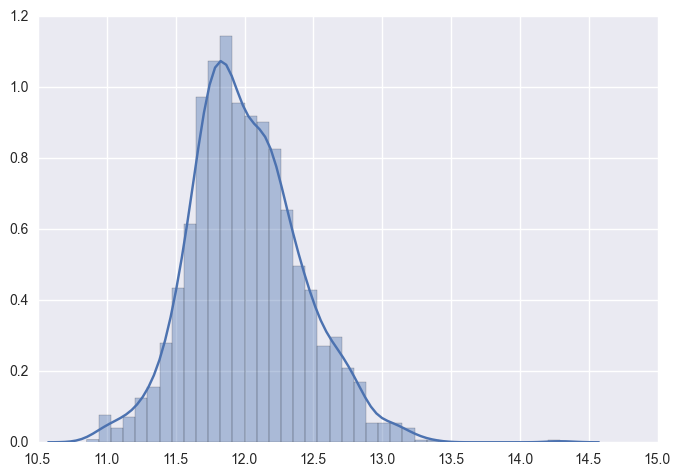

In [558]:
sns.distplot(np.expm1(ridge_y_test))

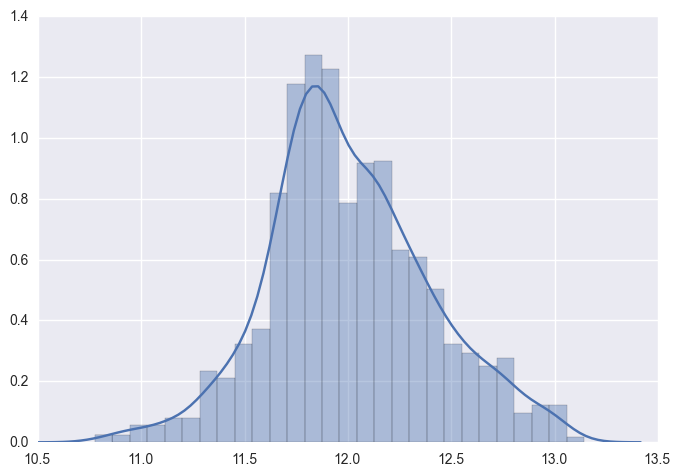

In [559]:
sns.distplot(np.expm1(xgb_y_test))

In [560]:
lasso_xgb_y_test = 0.7 * lasso_y_test + 0.3 * xgb_y_test

In [561]:
out_put(lasso_xgb_y_test)